In [62]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal

##### In the following, <b>we</b> will be representing the player that uses the number "0".

In [80]:
def compute_win_rate(first_move, d):
    """
    Computes the win rate in a game where two players take turns filling a grid with 0s and 1s randomly.

    Parameters:
        - zero_first (bool): True if we goes first, False otherwise.
        - d (int): The dimension of the game board (d x d).

    Returns:
        - float: Our sampled win rate in the specified game.
    """
    n = 50000 # Sample size

    # Who plays the first move wins
    if d == 1: return int(first_move)

    # The player who uses 0 always wins
    if d == 2: return 1

    win_count = 0   # Counts the number of winning

    # Determine the number of zeros (Notice that the ceil and floor functions keep the input unaffected when the dimension is even)
    # The player who plays first gets to place an extra number
    if first_move == True:
        num_of_zeros = int(np.ceil(d**2 /2))
    else:
        num_of_zeros = int(np.floor(d**2 /2))

    # Generate the random matrices
    for i in range(n):
        # Create a d by d matrix with all zeros
        matrix = np.ones((d, d), dtype=int)

        # Generate random indices and set them to 0
        indices = np.random.choice(int(d**2), num_of_zeros ,replace=False)
        matrix.flat[indices] = 0

        # If determinant is zero, count as win
        if np.linalg.det(matrix) == 0: win_count += 1

    win_rate = win_count / n

    return win_rate

In [105]:
N = 20

first_move_win_rate = [None] * N
second_move_win_rate = [None] * N

# Compute win rates for even dimensions
# Assuming no strategy is used, in a game with even dimension, the win rate does not depend on playing the first move
even_dim_win_rate = [compute_win_rate(True, d) for d in range(2, N+1, 2)]
first_move_win_rate[::2] = even_dim_win_rate
second_move_win_rate[::2] = even_dim_win_rate

# Compute win rates for odd dimensions
first_move_win_rate[1::2] = [compute_win_rate(True, d) for d in range(1, N, 2)]
second_move_win_rate[1::2] = [compute_win_rate(False, d) for d in range(1, N, 2)]

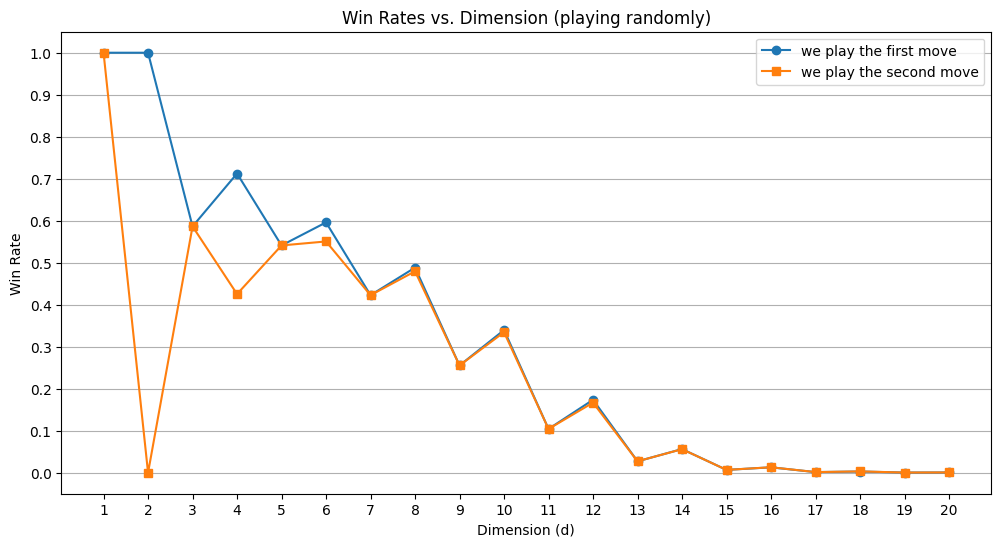

In [106]:
# Create a list of dimensions from 1 to N
dimensions = list(range(1, N+1))

# Create a figure and axis for the plot
plt.figure(figsize=(12, 6))
plt.plot(dimensions, first_move_win_rate, label='we play the first move', marker='o')
plt.plot(dimensions, second_move_win_rate, label='we play the second move', marker='s')

# Add labels and a legend
plt.xlabel('Dimension (d)')
plt.ylabel('Win Rate')
plt.title('Win Rates vs. Dimension (playing randomly)')
plt.xticks(dimensions)  # Ensure x-axis ticks are integers
plt.yticks(np.linspace(0,1,11))
plt.legend()
plt.grid(True, axis='y')
plt.show()